In [1]:
from astropy.table import Table, Column, table, vstack, join
from pathlib import Path
from matplotlib import pyplot as plt
from scipy.stats import norm

import numpy as np
import pandas as pd
import astropy.units as u
from astropy.coordinates import SkyCoord

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>.container { font-size:18px !important; }</style>"))

In [2]:
path_raw='../Datos/Raw/'
path_CIGALE_phot = '../Datos/Work/CIGALE_InputPhot/'
path_CIGALE_out = '../Datos/Work/CIGALE_Output/'
path_graphs = '../Datos/Final/Graphics/'
path_FINAL = '../Datos/Final/'

In [3]:
Ne_Sy = Table.read(path_FINAL+'Ne_ratios_-_CIGALE_results.tbl', format='ascii')

In [4]:
QSO = Table(Ne_Sy)

In [5]:
out = [i for i, otypes in enumerate(QSO['otypes']) if 'QSO' not in otypes]
len(out)

53

In [6]:
QSO.remove_rows(out)

In [7]:
QSO

Main_id,RA,DEC,otype,redshift,otypes,[NeV]*,[NeV]_err*,[NeII]*,[NeII]_err*,[NeV]/[NeII]*,[NeV]/[NeII]_err*,[NeV]$^+$,[NeV]_err$^+$,[NeIII]$^+$,[NeIII]_err$^+$,[NeV]/[NeIII]$^+$,[NeV]/[NeIII]_err$^+$,[NeIII]$^-$,[NeIII]_err$^-$,[NeII]$^-$,[NeII]_err$^-$,[NeIII]/[NeII]$^-$,[NeIII]/[NeII]_err$^-$,bayes.agn.fracAGN,bayes.agn.fracAGN_err,bayes.agn.i,bayes.agn.i_err,bayes.agn.disk_luminosity,bayes.agn.disk_luminosity_err,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.stellar.m_star,bayes.stellar.m_star_err,best.reduced_chi_square,log.reduced_chi_square,NED_Ne_IR_info
str24,float64,float64,str3,float64,str50,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str14
2C 1883,349.14663898619995,4.08841586141,Sy2,0.22,*|AGN|G|IR|QSO|Rad|Sy2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1000000000.0,70000000.0,3110000000.0,220000000.0,0.3215434083601286,0.03199976335108683,0.1676884426585983,0.07816057785123717,57.27044594574329,27.99390132811201,4.122521094010961e+36,5.782731031797155e+36,103.9120034706322,24.030265174755055,85948162689.7023,57012631337.310844,1.8403458401068076,0.26489944384462905,NeII|NeIII
2E 2389,166.0577547903,76.98283181919,Sy1,0.3115,*|BH?|G|IR|QSO|Rad|Sy1|UV|X|gam,505000000.0,59000000.0,437000000.0,40000000.0,1.1556064073226544,0.17151303566833198,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.8188987719707819,0.024258975221072464,26.011843998959925,11.071888539354369,1.8591392566232316e+39,1.255581728634208e+38,32.99957287515418,13.005716016371974,82007440862.93582,69392222513.68936,1.442908260688541,0.15923871976759285,NeII|NeV
2E 3648,245.09091058141,17.60665343366,Sy1,0.55517,*|BH?|G|IR|QSO|Rad|Sy1|X,1180000000.0,170000000.0,660000000.0,40000000.0,1.7878787878787878,0.279439361062646,1190000000.0,170000000.0,1610000000.0,130000000.0,0.7391975308641976,0.12011916377404842,1620000000.0,130000000.0,660000000.0,40000000.0,2.4545454545454546,0.2468333394786096,0.7373844941753334,0.09571439256469585,32.20528489575952,9.404682549643882,2.0566345877118184e+39,1.3435115805324631e+38,110.83038756721615,54.366157677823296,96631370793.32745,102566202983.27977,2.3766658631781086,0.37596812830862414,NeII|NeIII|NeV
2MASSI J0918486+211717,139.7025485953,21.288075035289996,Sy1,0.14903,*|AGN|IR|QSO|Sy1|X,4480000000.0,0.0,982000000.0,0.0,4.562118126272912,nan,4480000000.0,0.0,2600000000.0,0.0,1.7230769230769232,nan,2600000000.0,0.0,982000000.0,0.0,2.6476578411405294,nan,0.8988839720632542,0.013870021401598235,44.20391814907898,14.529180682596715,1.8396031516838928e+37,4.904386892756304e+36,0.5329401797567834,1.1935901737550823,152823017793.68384,53131442843.11487,0.9454285200616502,-0.024371300786463282,NeII|NeIII|NeV
2MASX J14510879+2709272,222.78651997439997,27.15748964087,Sy1,0.06449,*|AGN|G|IR|QSO|Rad|Sy1|UV|X,2670000000.0,0.0,507000000.0,0.0,5.266272189349112,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.899955362964844,0.0014940994387965115,7.5626569304964075,7.822212659918313,3.366525798361697e+37,1.6832628991808487e+36,0.15462531197470453,0.31682075857974806,26200318190.297752,11239826484.458948,1.2185272266241656,0.08583523745224399,NeII|NeV
3C 234.0,150.45634473807,28.7858176354,Sy1,0.18494,*|AGN|G|IR|QSO|Rad|Sy1|X|blu|gam,3300000000.0,700000000.0,800000000.0,200000000.0,4.125,1.3524428130239001,2825000000.0,743303437.3659253,5800000000.0,778203058.3337488,0.5468077474892397,0.13657008334636164,8200000000.0,700000000.0,800000000.0,200000000.0,10.25,2.7077723778043086,0.8034799514202404,0.05075017016454414,63.91729158454189,4.881367022531865,1.1161116813933017e+37,1.1278736022016923e+36,35.95897699663074,10.767347614953854,81806980038.3679,33820452612.22372,2.5104372093516596,0.39974936334306105,NeII|NeIII|NeV
7C 1821+6419,275.4883876131,64.34339480891,Sy1,0.297,*|AGN|G|IR|QSO|Rad|Sy1|UV|X|gam,5080000000.0,169000000.0,2750000000.0

In [8]:
#for cigpar in ['bayes.agn.luminosity', 'bayes.agn.disk_luminosity', 'bayes.agn.dust_luminosity',\
#             'bayes.agn.accretion_power']:
for cigpar in ['bayes.agn.disk_luminosity']:
    QSO[cigpar] = (QSO[cigpar]*u.W).to(u.solLum)
    QSO[cigpar+'_err'] = (QSO[cigpar+'_err']*u.W).to(u.solLum)

In [9]:
log_NeVNeII_QSO = np.log10(QSO[r'[NeV]/[NeII]*'])
log_NeVNeIII_QSO = np.log10(QSO[r'[NeV]/[NeIII]$^+$'])
log_NeIIINeII_QSO = np.log10(QSO[r'[NeIII]/[NeII]$^-$'])
log_sfr_QSO = np.log10(QSO['bayes.sfh.sfr'])
log_m_star_QSO = np.log10(QSO['bayes.stellar.m_star'])
log_l_diskAGN = np.log10(QSO['bayes.agn.disk_luminosity'])

log_NeV0 = np.log10(QSO[r'[NeV]*'])
log_NeII0 = np.log10(QSO[r'[NeII]*'])
log_NeV1 = np.log10(QSO[r'[NeV]$^+$'])
log_NeIII1 = np.log10(QSO[r'[NeIII]$^+$'])
log_NeIII2 = np.log10(QSO[r'[NeIII]$^-$'])
log_NeII2 = np.log10(QSO[r'[NeII]$^-$'])

log_NeVNeII_QSO_err = QSO[r'[NeV]/[NeII]_err*']/(QSO[r'[NeV]/[NeII]*']*np.log(10))
log_NeVNeIII_QSO_err = QSO[r'[NeV]/[NeIII]_err$^+$']/(QSO[r'[NeV]/[NeIII]$^+$']*np.log(10))
log_NeIIINeII_QSO_err = QSO[r'[NeIII]/[NeII]_err$^-$']/(QSO[r'[NeIII]/[NeII]$^-$']*np.log(10))
log_sfr_QSO_err = QSO['bayes.sfh.sfr_err']/(QSO['bayes.sfh.sfr']*np.log(10))
log_m_star_QSO_err = QSO['bayes.stellar.m_star_err']/(QSO['bayes.stellar.m_star']*np.log(10))
log_l_diskAGN_err = QSO['bayes.agn.disk_luminosity_err']/(QSO['bayes.agn.disk_luminosity']*np.log(10))

log_NeV0_err = QSO[r'[NeV]_err*']/(QSO[r'[NeV]*']*np.log(10))
log_NeII0_err = QSO[r'[NeII]_err*']/(QSO[r'[NeII]*']*np.log(10))
log_NeV1_err = QSO[r'[NeV]_err$^+$']/(QSO[r'[NeV]$^+$']*np.log(10))
log_NeIII1_err = QSO[r'[NeIII]_err$^+$']/(QSO[r'[NeIII]$^+$']*np.log(10))
log_NeIII2_err = QSO[r'[NeIII]_err$^-$']/(QSO[r'[NeIII]$^-$']*np.log(10))
log_NeII2_err = QSO[r'[NeII]_err$^-$']/(QSO[r'[NeII]$^-$']*np.log(10))

#Adding the new values to the table
QSO['log_[NeV]/[NeII]'] = log_NeVNeII_QSO
QSO['log_[NeV]/[NeII]_err'] = log_NeVNeII_QSO_err

QSO['log_[NeV]/[NeIII]'] = log_NeVNeIII_QSO
QSO['log_[NeV]/[NeIII]_err'] = log_NeVNeIII_QSO_err

QSO['log_[NeIII]/[NeII]'] = log_NeIIINeII_QSO
QSO['log_[NeIII]/[NeII]_err'] = log_NeIIINeII_QSO_err

QSO['log_bayes.sfh.sfr'] = log_sfr_QSO
QSO['log_bayes.sfh.sfr_err'] = log_sfr_QSO_err

QSO['log_bayes.stellar.m_star'] = log_m_star_QSO
QSO['log_bayes.stellar.m_star_err'] = log_m_star_QSO_err

QSO['log_bayes.agn.disk_luminosity'] = log_l_diskAGN
QSO['log_bayes.agn.disk_luminosity_err'] = log_l_diskAGN_err

QSO[r'log_[NeV]*'] = log_NeV0
QSO[r'log_[NeII]*'] = log_NeII0
QSO[r'log_[NeV]$^+$'] = log_NeV1
QSO[r'log_[NeIII]$^+$'] = log_NeIII1
QSO[r'log_[NeIII]$^-$'] = log_NeIII2
QSO[r'log_[NeII]$^-$'] = log_NeII2

QSO[r'log_[NeV]_err*'] = log_NeV0_err
QSO[r'log_[NeII]_err*'] = log_NeII0_err
QSO[r'log_[NeV]_err$^+$'] = log_NeV1_err
QSO[r'log_[NeIII]_err$^+$'] = log_NeIII1_err
QSO[r'log_[NeIII]_err$^-$'] = log_NeIII2_err
QSO[r'log_[NeII]_err$^-$'] = log_NeII2_err

In [10]:
NeVNeII_QSO = Table(QSO)
NeVNeII_QSO.remove_rows(np.where(np.isnan(NeVNeII_QSO[r'[NeV]/[NeII]*']))[0])
NeVNeIII_QSO = Table(QSO)
NeVNeIII_QSO.remove_rows(np.where(np.isnan(NeVNeIII_QSO[r'[NeV]/[NeIII]$^+$']))[0])
NeIIINeII_QSO = Table(QSO)
NeIIINeII_QSO.remove_rows(np.where(np.isnan(NeIIINeII_QSO[r'[NeIII]/[NeII]$^-$']))[0])

print('From the', len(QSO),'galaxies of the sample:')
print(len(NeVNeII_QSO),'galaxies have [NeV]/[NeII] info,')
print(len(NeVNeIII_QSO),'galaxies have [NeV]/[NeIII] info,')
print(len(NeIIINeII_QSO),'galaxies have [NeIII]/[NeII] info')

From the 42 galaxies of the sample:
36 galaxies have [NeV]/[NeII] info,
30 galaxies have [NeV]/[NeIII] info,
34 galaxies have [NeIII]/[NeII] info


In [11]:
NeVNeIIQSO_Sy1 = NeVNeII_QSO[NeVNeII_QSO['otype']=='Sy1']
NeVNeIIQSO_Sy2 = NeVNeII_QSO[NeVNeII_QSO['otype']=='Sy2']

print(len(NeVNeIIQSO_Sy1))
print(len(NeVNeIIQSO_Sy2))

32
4


In [19]:
df_QSO = QSO.to_pandas()
df_NeVNeII_QSO = NeVNeII_QSO.to_pandas()
df_NeVNeIII_QSO = NeVNeIII_QSO.to_pandas()
df_NeIIINeII_QSO = NeIIINeII_QSO.to_pandas()

df_NeVNeIIQSO_Sy1 = NeVNeIIQSO_Sy1.to_pandas()
df_NeVNeIIQSO_Sy2 = NeVNeIIQSO_Sy2.to_pandas()

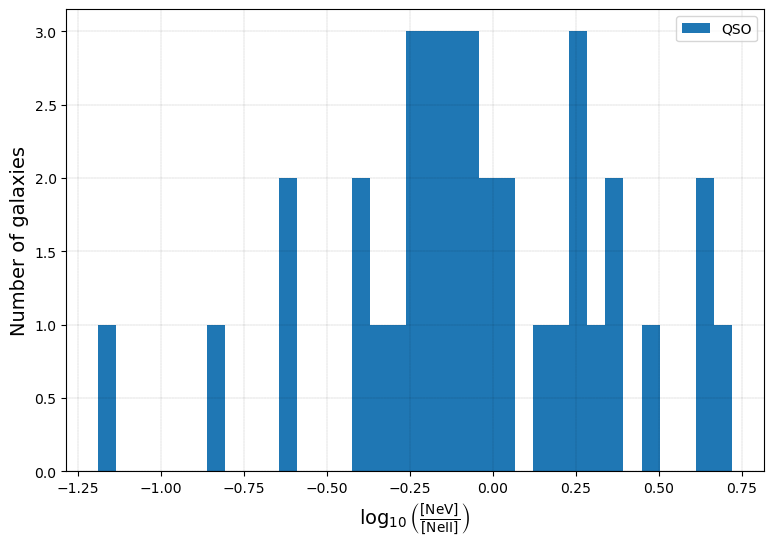

In [13]:
bins_NeVNeII_QSO = np.linspace(min(NeVNeII_QSO['log_[NeV]/[NeII]']),max(NeVNeII_QSO['log_[NeV]/[NeII]']),len(NeVNeII_QSO))
plt.figure(figsize=(9,6))
plt.hist(NeVNeII_QSO['log_[NeV]/[NeII]'], bins=bins_NeVNeII_QSO, label='QSO')
plt.xlabel(r'$\log_{10}\left(\frac{\mathregular{[NeV]}}{\mathregular{[NeII]}}\right)$',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.legend()
plt.grid(color='k', linestyle='--', linewidth=0.1)

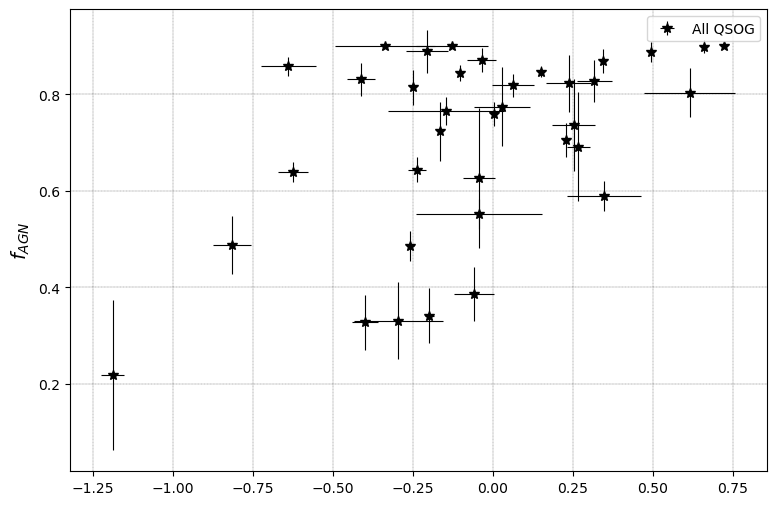

In [14]:
plt.figure(figsize=(9,6))
plt.errorbar(NeVNeII_QSO['log_[NeV]/[NeII]'], NeVNeII_QSO['bayes.agn.fracAGN'],NeVNeII_QSO['bayes.agn.fracAGN_err'], NeVNeII_QSO['log_[NeV]/[NeII]_err'],
             markersize=7,elinewidth=0.8,fmt='k*',label='All QSOG')
plt.ylabel(r'$f_{AGN}$', fontsize=14)
#ax1.set_ylim(-0.05,1.05)
plt.legend()
plt.grid(color='k', linestyle='--', linewidth=0.2)
plt.show()

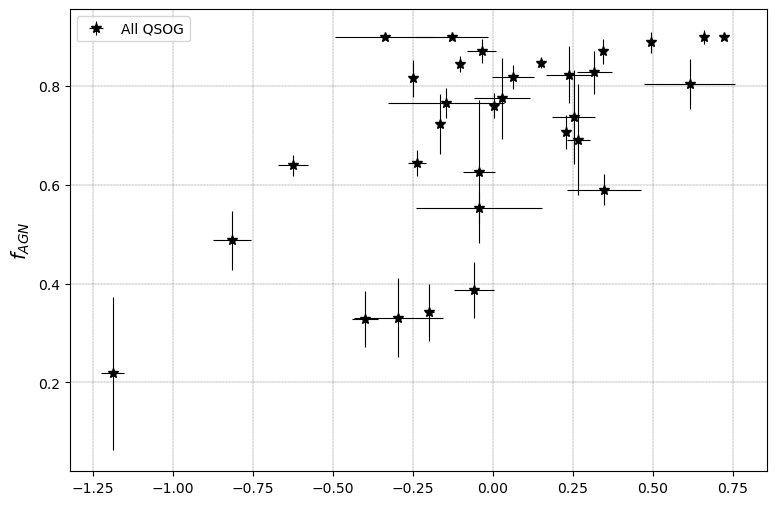

In [15]:
plt.figure(figsize=(9,6))
plt.errorbar(NeVNeIIQSO_Sy1['log_[NeV]/[NeII]'], NeVNeIIQSO_Sy1['bayes.agn.fracAGN'],
             NeVNeIIQSO_Sy1['bayes.agn.fracAGN_err'], NeVNeIIQSO_Sy1['log_[NeV]/[NeII]_err'],
             markersize=7,elinewidth=0.8,fmt='k*',label='All QSOG')
plt.ylabel(r'$f_{AGN}$', fontsize=14)
#ax1.set_ylim(-0.05,1.05)
plt.legend()
plt.grid(color='k', linestyle='--', linewidth=0.2)
plt.show()

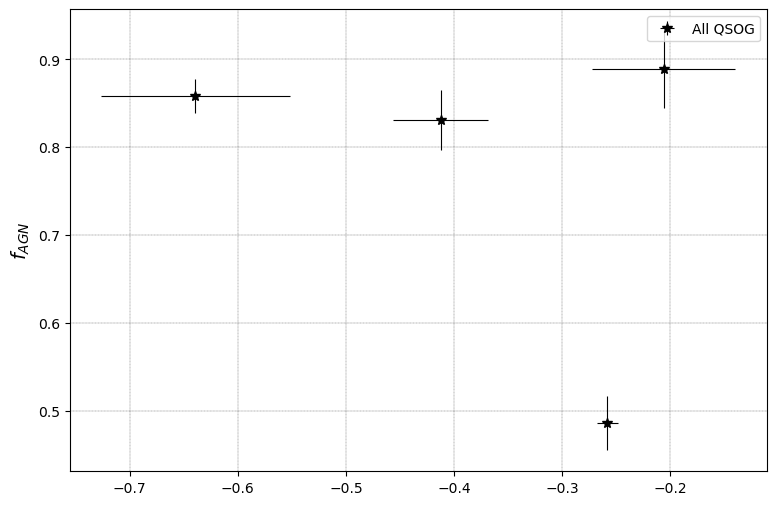

In [16]:
plt.figure(figsize=(9,6))
plt.errorbar(NeVNeIIQSO_Sy2['log_[NeV]/[NeII]'], NeVNeIIQSO_Sy2['bayes.agn.fracAGN'],
             NeVNeIIQSO_Sy2['bayes.agn.fracAGN_err'], NeVNeIIQSO_Sy2['log_[NeV]/[NeII]_err'],
             markersize=7,elinewidth=0.8,fmt='k*',label='All QSOG')
plt.ylabel(r'$f_{AGN}$', fontsize=14)
#ax1.set_ylim(-0.05,1.05)
plt.legend()
plt.grid(color='k', linestyle='--', linewidth=0.2)
plt.show()

In [22]:
NeVNeII_corr_fracAGN_QSO = df_NeVNeII_QSO['log_[NeV]/[NeII]'].corr(df_NeVNeII_QSO['bayes.agn.fracAGN'])
NeVNeII_corr_fracAGN_QSOSy1 = df_NeVNeIIQSO_Sy1['log_[NeV]/[NeII]'].corr(df_NeVNeIIQSO_Sy1['bayes.agn.fracAGN'])
NeVNeII_corr_fracAGN_QSOSy2 = df_NeVNeIIQSO_Sy2['log_[NeV]/[NeII]'].corr(df_NeVNeIIQSO_Sy2['bayes.agn.fracAGN'])

print('Pearson\'s correlation coefficient between [NeV]/[NeII] ratio and AGN fraction:')
print('Total Sample: ',NeVNeII_corr_fracAGN_QSO)
print('Seyfert 1: ',NeVNeII_corr_fracAGN_QSOSy1)
print('Seyfert 2: ',NeVNeII_corr_fracAGN_QSOSy2)


Pearson's correlation coefficient between [NeV]/[NeII] ratio and AGN fraction:
Total Sample:  0.5129636245075638
Seyfert 1:  0.6194584518896684
Seyfert 2:  -0.3532171947204417
